In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

def Neural_Network_Inator(input_size, no_hidden_nodes, output_size, eta, no_epochs):

# Define the neural network architecture
    class Net(nn.Module):
        def __init__(self, input_size, no_hidden_nodes,output_size):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(input_size, no_hidden_nodes)
            self.fc2 = nn.Linear(no_hidden_nodes, output_size)

        def forward(self, x):

            #x = torch.relu(self.fc1(x))
            x = torch.softmax(self.fc1(x),dim=1)
            x = self.fc2(x)
            return x

    net = Net(input_size, no_hidden_nodes,output_size)

    # Define the loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.SGD(net.parameters(), lr=eta)

    # Train the model for N epochs
    for epoch in range(no_epochs):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(input_data)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and update the weights
        loss.backward()
        optimizer.step()
    return net

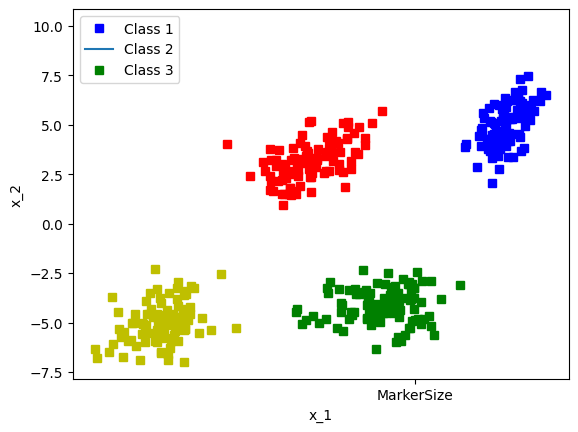

In [2]:
# In the following we sample from Gaussian distribution to generate 3 clusters
L = 100;

mu_1 = np.array([5, 5]); # mean 
Sigma_1 = np.array([[1, 0.5],[ 0.5, 1]]); # covariance
X_1 = np.random.multivariate_normal(mu_1,Sigma_1,L); # drawing samples from 2D Gaussian ditribution

mu_2 = np.array([-2, -4]);
Sigma_2 = np.array([[3, 0], [0, 1]]);
X_2 = np.random.multivariate_normal(mu_2,Sigma_2,L);

mu_3 = np.array([-6, 3]);
Sigma_3 = np.array([[3, 1], [1, 1]]);
X_3 = np.random.multivariate_normal(mu_3,Sigma_3,L);

mu_4 = np.array([-14, -5]);
Sigma_4 = np.array([[2, 0.5], [0.5, 1]]);
X_4 = np.random.multivariate_normal(mu_4,Sigma_4,L);

#figure
plt.plot(X_1[:,0],X_1[:,1],'bs','MarkerSize',10)
plt.plot(X_2[:,0],X_2[:,1],'gs','MarkerSize',10)
plt.plot(X_3[:,0],X_3[:,1],'rs','MarkerSize',10) 
plt.plot(X_4[:,0],X_4[:,1],'ys','MarkerSize',10) 

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.show


# Classification (2 classes)
C_1 = np.matlib.repmat([0,0,0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([0,0,1,0],L,1); # generate labels for Class 2
C_3 = np.matlib.repmat([0,1,0,0],L,1);
C_4 = np.matlib.repmat([1,0,0,0],L,1);

C = np.concatenate((C_1,C_2,C_3,C_4))
X = np.concatenate((X_1,X_2,X_3,X_4))

# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 
#data_set = np.concatenate([data_set,C2],1);


rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.

# Data_set is a 20000x4 with
# x_1,x_2,c_1,c_2

In [3]:
# Creating training and test data to tensor
percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

train_dataset =torch.tensor(train_dataset)
test_dataset = torch.tensor(test_dataset)
train_dataset = train_dataset.clone().detach()
test_dataset = test_dataset.clone().detach()

In [4]:
# Define the training data
input_data = train_dataset[:,:2]
input_data = torch.reshape(input_data,(amount,2))
input_data = input_data.to(torch.float32)


# Define the labels
labels = train_dataset[:,2:]
labels = torch.reshape(labels,(amount,4))
labels = labels.to(torch.float32)

In [5]:
net = Neural_Network_Inator(2,50,4,0.09,1000)

In [17]:
test_input = test_dataset[:,:2]
test_input = torch.reshape(test_input,(79,2))
test_input = test_input.to(torch.float32)
output = net(test_input)
t_calc = []
for i in range(len(output)):
    result = [tensor.item() for tensor in output[i]]
    t_calc.append(result)

t = []
for i in range(len(test_dataset)):
    result = [tensor.item() for tensor in test_dataset[i,2:]]
    t.append(result)

classification_errors = 0
#t = test_dataset[:,2:]
#t_pred = np.array([t_test1,t_test2,t_test3,t_test4])
for i, classification in enumerate(t):
    if np.argmax(t_calc[i]) == np.argmax(classification):
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    



print(f'The number of classification errors is: {classification_errors} out of {len(t)}')

The number of classification errors is: 0 out of 79
